Importing the Libaries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: nicer plots
sns.set(style="whitegrid")



Loading the data


In [3]:
# Load the uploaded CSV
df = pd.read_csv("Telco-Customer-Churn.csv")

# Check first 5 rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Inspecting the data and missing values

In [4]:
# Info & data types
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


cleaning the data

In [5]:
# Convert TotalCharges to numeric (some values are empty strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing TotalCharges with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Standardize categorical columns
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].str.lower().str.strip()


/tmp/ipython-input-1930624997.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


Basic Analysis & Visualization

/tmp/ipython-input-3818126903.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df, palette="Set2")


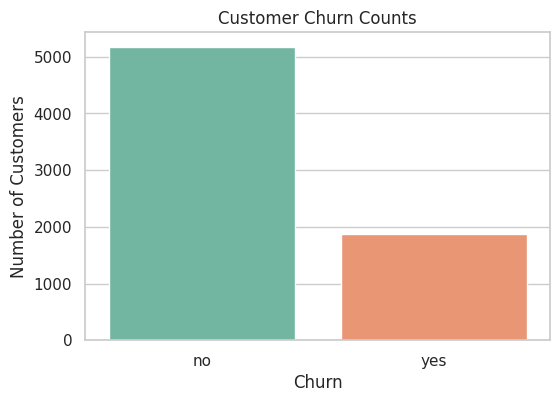

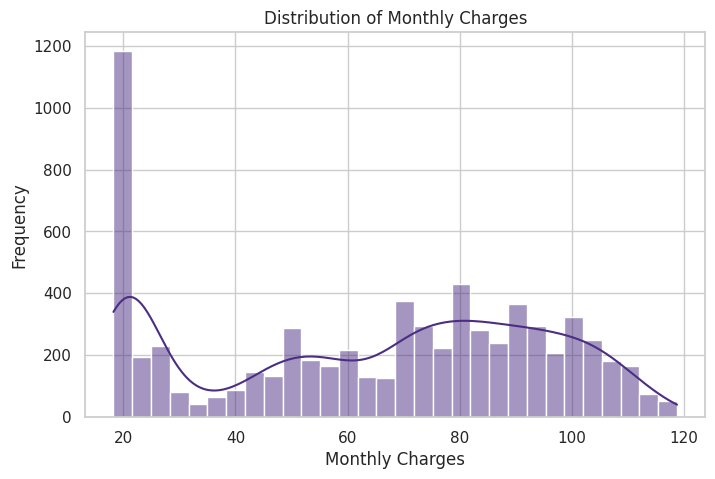

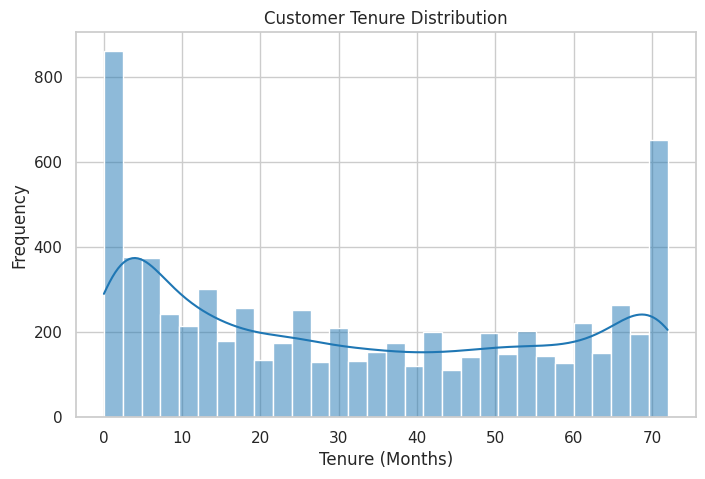

/tmp/ipython-input-3818126903.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='internetservice', data=df, palette="magma")


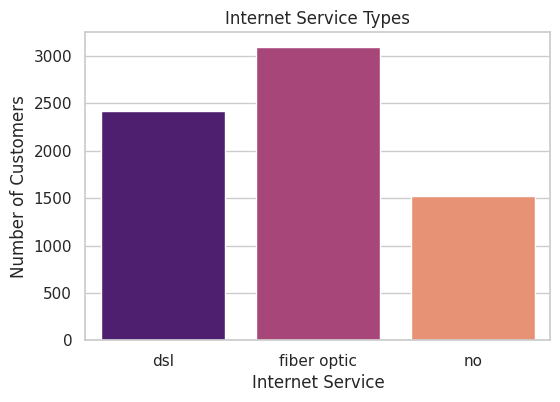

Average Monthly Charges by Churn:
 churn
no     61.265124
yes    74.441332
Name: monthlycharges, dtype: float64

Customer Churn Percentage:
 churn
no     73.463013
yes    26.536987
Name: proportion, dtype: float64


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize column names (just in case)
df.columns = df.columns.str.lower()

# 1️⃣ Churn Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=df, palette="Set2")
plt.title("Customer Churn Counts")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()

# 2️⃣ Monthly Charges Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['monthlycharges'], bins=30, kde=True, color="#4b2e83")
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.show()

# 3️⃣ Tenure Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['tenure'], bins=30, kde=True, color="#1f77b4")
plt.title("Customer Tenure Distribution")
plt.xlabel("Tenure (Months)")
plt.ylabel("Frequency")
plt.show()

# 4️⃣ Internet Service Type Count
plt.figure(figsize=(6,4))
sns.countplot(x='internetservice', data=df, palette="magma")
plt.title("Internet Service Types")
plt.xlabel("Internet Service")
plt.ylabel("Number of Customers")
plt.show()

# 5️⃣ Average Monthly Charges by Churn
avg_monthly_by_churn = df.groupby('churn')['monthlycharges'].mean()
print("Average Monthly Charges by Churn:\n", avg_monthly_by_churn)

# 6️⃣ Churn Rate %
churn_rate = df['churn'].value_counts(normalize=True) * 100
print("\nCustomer Churn Percentage:\n", churn_rate)


cleaning the data

In [9]:
from google.colab import files

# Save the cleaned DataFrame to CSV
df.to_csv("cleaned_telco_data.csv", index=False)
print("Cleaned dataset saved as 'cleaned_telco_data.csv'")

# Optional: Download directly in Colab
files.download("cleaned_telco_data.csv")


Cleaned dataset saved as 'cleaned_telco_data.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
# Percentage of customers who churned
churn_pct = df['churn'].value_counts(normalize=True) * 100
print("Churn Percentage:\n", churn_pct)

# Average monthly charges by churn
avg_monthly_by_churn = df.groupby('churn')['monthlycharges'].mean()
print("\nAverage Monthly Charges by Churn:\n", avg_monthly_by_churn)

# Top 3 Internet Services by number of customers
top_internet = df['internetservice'].value_counts().head(3)
print("\nTop Internet Service Types:\n", top_internet)


Churn Percentage:
 churn
no     73.463013
yes    26.536987
Name: proportion, dtype: float64

Average Monthly Charges by Churn:
 churn
no     61.265124
yes    74.441332
Name: monthlycharges, dtype: float64

Top Internet Service Types:
 internetservice
fiber optic    3096
dsl            2421
no             1526
Name: count, dtype: int64
